In [348]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,6)
pd.options.display.float_format = "{:,.1f}".format
plt.style.use('seaborn-v0_8-ticks')

<h1>Loading Dataset</h1>

In [349]:
df = pd.read_csv(r"D:\nevinphilbert\Portfolio\Python Builder\World Expenditure Analysis\WorldExpenditures.csv")
df.head()

Year    Country                                      Sector  \
0  2000  Australia                              Total function   
1  2000  Australia  Agriculture, forestry, fishing and hunting   
2  2000  Australia      Mining, manufacturing and construction   
3  2000  Australia                                   Transport   
4  2000  Australia                             Fuel and energy   

   Expenditure(million USD)  GDP(%)  
0                 153,122.6    37.4  
1                   2,195.6     0.5  
2                     905.0     0.2  
3                  11,417.4     2.8  
4                   2,251.2     0.5

<h1>Getting Overview of data, checking values & preparation for data cleaning</h1>

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25733 entries, 0 to 25732
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      25733 non-null  int64  
 1   Country                   25733 non-null  object 
 2   Sector                    25733 non-null  object 
 3   Expenditure(million USD)  25173 non-null  float64
 4   GDP(%)                    25173 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1005.3+ KB


In [351]:
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

Rows: 25733
Columns: 5


In [352]:
df.describe()

Year  Expenditure(million USD)   GDP(%)
count 25,733.0                  25,173.0 25,173.0
mean   2,011.3                  36,561.9      4.5
std        6.1                 246,497.2      9.8
min    2,000.0                       0.0      0.0
25%    2,006.0                     132.8      0.2
50%    2,012.0                   1,171.6      1.1
75%    2,017.0                   8,350.3      3.9
max    2,021.0              10,476,081.8    131.4

In [353]:
#checking duplicates
df.duplicated(subset=['Year', 'Country', 'Sector']).sum()

0

<h2>World Expenditure Dataset from 2000 - 2021</h2>
<h3>Overview</h3>

<p>The World Expenditure dataset contains information on expenditure and GDP (%) for various countries across different sectors over multiple years. This documentation provides details about the columns present in the dataset.</p>

<h3>Columns</h3>
<ol>
    <li>
        <ul>
            <li>Year:</li>
            <li>Data Type: Integer</li>
            <li>Description: Represents the year in which the expenditure and GDP data were recorded.</li>
        </ul>
    </li>
    <li>
        <ul>
            <li>Country:</li>
            <li>Data Type: String</li>
            <li>Description: Indicates the name of the country for which expenditure and GDP data are reported.</li>
        </ul>
    </li>
    <li>
        <ul>
            <li>Sector:</li>
            <li>Data Type: String</li>
            <li>Description: Specifies the sector to which the expenditure pertains. Examples of sectors may include healthcare, education, defense, etc.</li>
        </ul>
    </li>
    <li>
        <ul>
            <li>Expenditure (million USD):</li>
            <li>Data Type: Float</li>
            <li>Description: Represents the expenditure amount in million USD for the corresponding country and sector.</li>
        </ul>
    </li>
    <li>
        <ul>
            <li>GDP (%):</li>
            <li>Data Type: Float</li>
            <li>Description: Indicates the GDP percentage for the corresponding country and sector. It represents the contribution of the sector's expenditure to the country's Gross Domestic Product (GDP) as a percentage.</li>
        </ul>
    </li>    
</ol>

<h3>Notes</h3>
    <p>The dataset contains records for multiple years, covering expenditure and GDP data for various countries and sectors.
    Expenditure values are reported in million USD. GDP (%) values represent the sector's contribution to the country's GDP as a percentage. Missing values may be present in the dataset, especially for certain countries and sectors. Careful consideration should be given to handling missing data during data analysis.</p>

In [354]:
df_nan = df[df['Expenditure(million USD)'].isna() | df['GDP(%)'].isna()]
df_nan.head()

Year    Country                                      Sector  \
301  2000  Indonesia                              Total function   
302  2000  Indonesia  Agriculture, forestry, fishing and hunting   
303  2000  Indonesia      Mining, manufacturing and construction   
304  2000  Indonesia                                   Transport   
305  2000  Indonesia                               Communication   

     Expenditure(million USD)  GDP(%)  
301                       NaN     NaN  
302                       NaN     NaN  
303                       NaN     NaN  
304                       NaN     NaN  
305                       NaN     NaN

In [355]:
#let's narrow it down to only countries that has null values
df[df.isna().any(axis=1)].groupby('Country').apply(lambda x: x.isna().sum()).sort_values(by='Expenditure(million USD)', ascending=False)

Year  Country  Sector  Expenditure(million USD)  GDP(%)
Country                                                                       
Serbia and Montenegro     0        0       0                       280     280
Serbia                    0        0       0                       160     160
Indonesia                 0        0       0                        60      60
Timor-Leste               0        0       0                        60      60

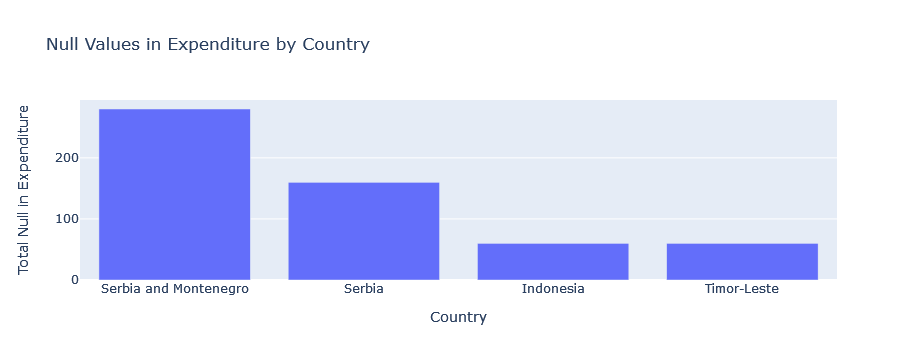

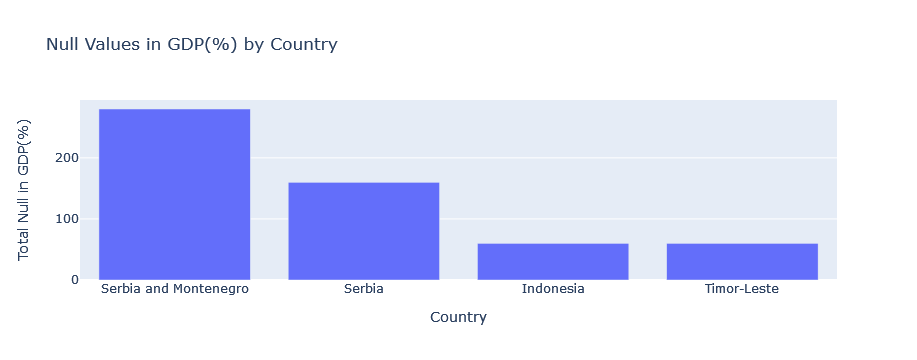

In [356]:
null_values_expenditure_by_country = df[df['Expenditure(million USD)'].isnull()].groupby('Country').size().reset_index(name='Null_Count').sort_values(by='Null_Count', ascending=False)
null_values_gdp_by_country = df[df['GDP(%)'].isna()].groupby('Country').size().reset_index(name='Null_Count').sort_values(by='Null_Count', ascending=False)
fig = px.bar(null_values_expenditure_by_country, x='Country', y='Null_Count', title='Null Values in Expenditure by Country')
fig2 = px.bar(null_values_gdp_by_country, x='Country', y='Null_Count', title='Null Values in GDP(%) by Country')
fig.update_xaxes(title='Country')
fig.update_yaxes(title='Total Null in Expenditure')
fig2.update_xaxes(title='Country')
fig2.update_yaxes(title='Total Null in GDP(%)')
fig.show()
fig2.show()

<h5>Null Count in Expenditure and GDP</h5>

| Country              | Null Count in Expenditure | Null Count in GDP |
|----------------------|------------|------------|
| Serbia and Montenegro| 280        | 280        |
| Serbia               | 160        | 160        |
| Indonesia            | 60         | 60         |
| Timor-Leste          | 60         | 60         |

<h1>Data Cleaning</h1>

<h5><b>let's start from the largest one first, Serbia and Montenegro</b></h5>

In [357]:
serbia_montenegro = df[df['Country'].isin(['Serbia and Montenegro'])]
serbia_montenegro[serbia_montenegro.notna().all(axis=1)]

Year                Country                            Sector  \
7751  2007  Serbia and Montenegro                    Total function   
7752  2007  Serbia and Montenegro            Environment protection   
7753  2007  Serbia and Montenegro   Housing and community amenities   
7754  2007  Serbia and Montenegro                            Health   
7755  2007  Serbia and Montenegro                         Education   
7756  2007  Serbia and Montenegro                 Social protection   
7757  2007  Serbia and Montenegro           General public services   
7758  2007  Serbia and Montenegro                           Defence   
7759  2007  Serbia and Montenegro           Public order and safety   
7760  2007  Serbia and Montenegro  Recreation, culture and religion   

      Expenditure(million USD)  GDP(%)  
7751                  18,066.6    35.3  
7752                     141.8     0.3  
7753                     792.9     1.5  
7754                   2,612.1     5.1  
7755                   1,682.2     3.3  
7756                   6,286.8    12.3  
7757                   1,690.8     3.3  
7758                   1,007.0     2.0  
7759                   1,118.5     2.2  
7760                     431.7     0.8

In [358]:
serbia_montenegro.describe()

Year  Expenditure(million USD)  GDP(%)
count   290.0                      10.0    10.0
mean  2,014.2                   3,383.1     6.6
std       4.2                   5,447.6    10.6
min   2,007.0                     141.8     0.3
25%   2,011.0                     846.4     1.7
50%   2,014.0                   1,400.4     2.7
75%   2,018.0                   2,381.8     4.7
max   2,021.0                  18,066.6    35.3

<p>Serbia and Montenegro only reported their expenditure details in 2007. Due to the significant null count in the 'Expenditure' and 'GDP' column for Serbia and Montenegro, it was decided to drop the corresponding rows to prevent bias and ensure the integrity of the analysis.</p>

In [359]:
df.drop(serbia_montenegro.index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [360]:
#check to see if it's dropped
df[df['Country'].isin(['Serbia and Montenegro'])]

Empty DataFrame
Columns: [Year, Country, Sector, Expenditure(million USD), GDP(%)]
Index: []

<h5><b>Serbia</b></h5>

In [361]:
serbia = df[df['Country'].isin(['Serbia'])]
serbia[serbia.notna().all(axis=1)].head()

Year Country                           Sector  Expenditure(million USD)  \
8807  2008  Serbia                   Total function                  22,332.1   
8808  2008  Serbia           Environment protection                     177.8   
8809  2008  Serbia  Housing and community amenities                     943.3   
8810  2008  Serbia                           Health                   3,068.5   
8811  2008  Serbia                        Education                   2,234.2   

      GDP(%)  
8807    38.9  
8808     0.3  
8809     1.6  
8810     5.3  
8811     3.9

In [362]:
#checking serbia data
serbia.describe()

Year  Expenditure(million USD)  GDP(%)
count   220.0                      60.0    60.0
mean  2,005.3                   3,165.3     6.1
std       3.7                   5,475.0    10.5
min   2,000.0                      17.9     0.0
25%   2,002.0                     453.4     0.9
50%   2,005.0                   1,220.1     2.1
75%   2,008.0                   2,278.7     4.4
max   2,012.0                  22,332.1    38.9

In [363]:
#let's try to compare it with other balkans country
albania = df[df['Country'].isin(['Albania'])]
#albania[albania.notna().all(axis=1)]

In [364]:
albania.describe()

Year  Expenditure(million USD)  GDP(%)
count   276.0                     276.0   276.0
mean  2,013.7                     433.2     3.4
std       4.9                     912.7     7.0
min   2,005.0                       0.0     0.0
25%   2,011.0                       6.2     0.0
50%   2,014.0                     105.5     0.8
75%   2,018.0                     373.6     3.1
max   2,021.0                   5,737.2    32.5

<p>Serbia only reported their expenditure details from 2000 to 2012. Due to the significant null count in the 'Expenditure' and 'GDP' column for Serbia, it was decided to drop the corresponding rows to prevent bias and ensure the integrity of the analysis.</p>

In [365]:
df.drop(serbia.index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [366]:
df[df['Country'].isin(['Serbia'])]

Empty DataFrame
Columns: [Year, Country, Sector, Expenditure(million USD), GDP(%)]
Index: []

<h5><b>Indonesia</b></h5>

In [367]:
indonesia = df[df['Country'].isin(['Indonesia'])]
indonesia[indonesia.notna().all(axis=1)].head()

Year    Country                           Sector  \
8242  2008  Indonesia                   Total function   
8243  2008  Indonesia           Environment protection   
8244  2008  Indonesia  Housing and community amenities   
8245  2008  Indonesia                           Health   
8246  2008  Indonesia                        Education   

      Expenditure(million USD)  GDP(%)  
8242                 108,259.0    19.9  
8243                   1,527.3     0.3  
8244                   9,242.2     1.7  
8245                   6,386.4     1.2  
8246                  12,359.7     2.3

In [368]:
indonesia[indonesia['Expenditure(million USD)'].isnull()].head()

Year    Country                                      Sector  \
301  2000  Indonesia                              Total function   
302  2000  Indonesia  Agriculture, forestry, fishing and hunting   
303  2000  Indonesia      Mining, manufacturing and construction   
304  2000  Indonesia                                   Transport   
305  2000  Indonesia                               Communication   

     Expenditure(million USD)  GDP(%)  
301                       NaN     NaN  
302                       NaN     NaN  
303                       NaN     NaN  
304                       NaN     NaN  
305                       NaN     NaN

In [369]:
indonesia[indonesia['GDP(%)'].isnull()].head()

Year    Country                                      Sector  \
301  2000  Indonesia                              Total function   
302  2000  Indonesia  Agriculture, forestry, fishing and hunting   
303  2000  Indonesia      Mining, manufacturing and construction   
304  2000  Indonesia                                   Transport   
305  2000  Indonesia                               Communication   

     Expenditure(million USD)  GDP(%)  
301                       NaN     NaN  
302                       NaN     NaN  
303                       NaN     NaN  
304                       NaN     NaN  
305                       NaN     NaN

In [370]:
indonesia.describe()

Year  Expenditure(million USD)  GDP(%)
count   200.0                     140.0   140.0
mean  2,010.5                  30,073.6     3.3
std       7.1                  48,898.4     5.3
min   2,000.0                     524.6     0.1
25%   2,002.0                   2,360.1     0.3
50%   2,011.5                  10,162.9     1.1
75%   2,016.2                  28,066.3     3.0
max   2,021.0                 225,046.7    19.9

Since Indonesia has null values only from the years 2000 to 2002, we can proceed by dropping the rows corresponding to these years from the Indonesia dataset.

In [371]:
#let's filter the indonesia into only ones that has null values
indonesia = indonesia[indonesia['Expenditure(million USD)'].isnull() | indonesia['GDP(%)'].isnull()]
df.drop(indonesia.index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [372]:
df[df['Country'].isin(['Indonesia'])].head()

Year    Country                           Sector  \
8182  2008  Indonesia                   Total function   
8183  2008  Indonesia           Environment protection   
8184  2008  Indonesia  Housing and community amenities   
8185  2008  Indonesia                           Health   
8186  2008  Indonesia                        Education   

      Expenditure(million USD)  GDP(%)  
8182                 108,259.0    19.9  
8183                   1,527.3     0.3  
8184                   9,242.2     1.7  
8185                   6,386.4     1.2  
8186                  12,359.7     2.3

<h5><b>Timor Leste</b></h5>

In [373]:
tl = df[df['Country'].isin(['Timor-Leste'])]
tl[tl.notna().all(axis=1)]

Year      Country                            Sector  \
10985  2010  Timor-Leste                    Total function   
12151  2011  Timor-Leste                    Total function   
13359  2012  Timor-Leste                    Total function   
13360  2012  Timor-Leste            Environment protection   
13361  2012  Timor-Leste   Housing and community amenities   
13362  2012  Timor-Leste                            Health   
13363  2012  Timor-Leste                         Education   
13364  2012  Timor-Leste                 Social protection   
13365  2012  Timor-Leste           General public services   
13366  2012  Timor-Leste                           Defence   
13367  2012  Timor-Leste           Public order and safety   
13368  2012  Timor-Leste  Recreation, culture and religion   
14647  2013  Timor-Leste                    Total function   

       Expenditure(million USD)  GDP(%)  
10985                   1,020.2   115.7  
12151                   1,369.5   131.4  
13359                   1,456.4   125.5  
13360                       2.4     0.2  
13361                      20.1     1.7  
13362                      53.3     4.6  
13363                     109.0     9.4  
13364                     160.5    13.8  
13365                     178.2    15.4  
13366                      39.9     3.4  
13367                      49.0     4.2  
13368                       9.8     0.8  
14647                   1,235.8    88.6

In [374]:
tl[tl['Expenditure(million USD)'].isnull()].head()

Year      Country                                      Sector  \
696  2000  Timor-Leste                              Total function   
697  2000  Timor-Leste  Agriculture, forestry, fishing and hunting   
698  2000  Timor-Leste      Mining, manufacturing and construction   
699  2000  Timor-Leste                                   Transport   
700  2000  Timor-Leste                               Communication   

     Expenditure(million USD)  GDP(%)  
696                       NaN     NaN  
697                       NaN     NaN  
698                       NaN     NaN  
699                       NaN     NaN  
700                       NaN     NaN

In [375]:
tl[tl['GDP(%)'].isnull()].head()

Year      Country                                      Sector  \
696  2000  Timor-Leste                              Total function   
697  2000  Timor-Leste  Agriculture, forestry, fishing and hunting   
698  2000  Timor-Leste      Mining, manufacturing and construction   
699  2000  Timor-Leste                                   Transport   
700  2000  Timor-Leste                               Communication   

     Expenditure(million USD)  GDP(%)  
696                       NaN     NaN  
697                       NaN     NaN  
698                       NaN     NaN  
699                       NaN     NaN  
700                       NaN     NaN

Since Timor Leste only has null values from the years 2000 to 2002, we can proceed by dropping the rows corresponding to these years from the dataset.

In [376]:
tl = tl[tl['Expenditure(million USD)'].isnull() | tl['GDP(%)'].isnull()]
tl.head()

Year      Country                                      Sector  \
696  2000  Timor-Leste                              Total function   
697  2000  Timor-Leste  Agriculture, forestry, fishing and hunting   
698  2000  Timor-Leste      Mining, manufacturing and construction   
699  2000  Timor-Leste                                   Transport   
700  2000  Timor-Leste                               Communication   

     Expenditure(million USD)  GDP(%)  
696                       NaN     NaN  
697                       NaN     NaN  
698                       NaN     NaN  
699                       NaN     NaN  
700                       NaN     NaN

In [377]:
df.drop(tl.index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [378]:
df[df['Country'].isin(['Timor-Leste'])]

Year      Country                            Sector  \
10925  2010  Timor-Leste                    Total function   
12091  2011  Timor-Leste                    Total function   
13299  2012  Timor-Leste                    Total function   
13300  2012  Timor-Leste            Environment protection   
13301  2012  Timor-Leste   Housing and community amenities   
13302  2012  Timor-Leste                            Health   
13303  2012  Timor-Leste                         Education   
13304  2012  Timor-Leste                 Social protection   
13305  2012  Timor-Leste           General public services   
13306  2012  Timor-Leste                           Defence   
13307  2012  Timor-Leste           Public order and safety   
13308  2012  Timor-Leste  Recreation, culture and religion   
14587  2013  Timor-Leste                    Total function   

       Expenditure(million USD)  GDP(%)  
10925                   1,020.2   115.7  
12091                   1,369.5   131.4  
13299                   1,456.4   125.5  
13300                       2.4     0.2  
13301                      20.1     1.7  
13302                      53.3     4.6  
13303                     109.0     9.4  
13304                     160.5    13.8  
13305                     178.2    15.4  
13306                      39.9     3.4  
13307                      49.0     4.2  
13308                       9.8     0.8  
14587                   1,235.8    88.6

In [379]:
df.isna().sum()

Year                        0
Country                     0
Sector                      0
Expenditure(million USD)    0
GDP(%)                      0
dtype: int64

<h5><b>Saving the cleaned dataset</b></h5>

In [380]:
df.to_csv(r"D:\nevinphilbert\Portfolio\Python Builder\World Expenditure Analysis\WorldExpendituresCleaned.csv", index=False)

<h1>Exploratory Data Analysis</h1>

<h5><b>Load the cleaned dataset</b></h5>

In [381]:
df = pd.read_csv(r"D:\nevinphilbert\Portfolio\Python Builder\World Expenditure Analysis\WorldExpendituresCleaned.csv")

<h5><b>I want to get the consistent data, let's take only the data of countries where all sectors they're spending their expenditure are reported every year</b></h5>

In [382]:
df_groupby_country = df.groupby('Country').agg({
    'Year': 'nunique',  # Count the number of years for each country (optional)
    'Expenditure(million USD)': 'sum',  # Sum of expenditure for each country
    'GDP(%)': 'mean'  # Mean GDP percentage for each country
})
df_groupby_country

Year  Expenditure(million USD)  GDP(%)
Country                                                                 
Afghanistan                         12                 234,106.4     8.9
Albania                             16                 119,566.7     3.4
Armenia                             18                  70,173.2     5.3
Australia                           22              19,186,833.5     4.1
Austria                             22               8,415,252.2     5.4
Azerbaijan                          14                 504,231.3     3.9
Belarus                             18                 802,087.7     5.1
Belgium                             22              10,479,205.7     5.7
Bolivia (Plurinational State of)     8                  45,367.7     5.1
Brazil                              21              25,917,251.4     5.1
Bulgaria                            22                 781,113.2     4.3
Canada                              14              18,011,319.8     4.8
Chile                                9               1,272,842.1     5.2
China                               16              80,711,231.1     3.3
China, Hong Kong SAR                19               1,985,278.6     2.1
China, Macao SAR                    22                 222,220.0     3.5
Colombia                            13               2,549,139.6     3.4
Cook Islands                        12                   2,203.0     6.3
Costa Rica                           9                 340,531.8     3.5
Croatia                             22                 146,074.6     0.7
Cyprus                              22                 384,936.2     4.2
Czechia                             22               3,474,116.3     4.5
Denmark                             22               7,017,374.9     5.6
Egypt                               14               1,640,024.2     5.3
El Salvador                         20                 206,566.5     3.4
Estonia                             22                 358,935.5     4.1
Fiji                                11                  14,844.7    12.5
Finland                             22               5,437,278.4     5.6
France                              22              59,595,346.9     5.8
Georgia                             22                 158,672.3     3.0
Germany                             22              66,943,414.4     4.9
Greece                              22               5,203,960.6     5.5
Guatemala                            8                 188,158.4     1.7
Hungary                             22               2,694,926.2     5.1
Iceland                             22                 357,833.2     5.1
India                               10               9,718,786.0     4.2
Indonesia                           14               4,210,306.9     3.3
Iran (Islamic Republic of)           9               1,031,923.4     4.4
Ireland                             22               3,870,339.6     3.7
Israel                              22               4,591,501.6     6.4
Italy                               22              41,697,664.6     5.3
Japan                               17              68,647,303.0     4.1
Kazakhstan                          21               1,077,137.9     4.2
Kenya                                3                  88,232.6     5.0
Kiribati                            11                   2,926.8    14.2
Korea, Republic of                  21              13,607,244.7     5.4
Kuwait                               6                 246,651.6     5.4
Kyrgyzstan                           8                  41,147.3     3.8
Latvia                              22                 430,275.0     4.0
Lithuania                           22                 624,174.8     3.9
Luxembourg                          22                 978,594.7     4.4
Malaysia                            21               2,074,102.6     6.4
Maldives                            22                  42,841.5     4.8
Malta              

In [383]:
country = df_groupby_country[df_groupby_country['Year'] >= 22].reset_index()
country.head()

Country  Year  Expenditure(million USD)  GDP(%)
0         Australia    22              19,186,833.5     4.1
1           Austria    22               8,415,252.2     5.4
2           Belgium    22              10,479,205.7     5.7
3          Bulgaria    22                 781,113.2     4.3
4  China, Macao SAR    22                 222,220.0     3.5

In [384]:
country_cons = country['Country'].values
country_cons

array(['Australia', 'Austria', 'Belgium', 'Bulgaria', 'China, Macao SAR',
       'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland',
       'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Maldives', 'Malta', 'Mongolia', 'Netherlands (Kingdom of the)',
       'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania',
       'Russian Federation', 'Singapore', 'Slovakia', 'Slovenia',
       'South Africa', 'Spain', 'Sweden', 'Switzerland, Liechtenstein',
       'Thailand', 'United Kingdom', 'United States of America'],
      dtype=object)

In [385]:
df_use = df[df['Country'].isin(country_cons)]
df_use.reset_index(drop=True, inplace=True)
df_use.head()

Year    Country                                      Sector  \
0  2000  Australia                              Total function   
1  2000  Australia  Agriculture, forestry, fishing and hunting   
2  2000  Australia      Mining, manufacturing and construction   
3  2000  Australia                                   Transport   
4  2000  Australia                             Fuel and energy   

   Expenditure(million USD)  GDP(%)  
0                 153,122.6    37.4  
1                   2,195.6     0.5  
2                     905.0     0.2  
3                  11,417.4     2.8  
4                   2,251.2     0.5

In [386]:
df_use.describe()

Year  Expenditure(million USD)   GDP(%)
count 16,254.0                  16,254.0 16,254.0
mean   2,010.7                  41,234.3      4.6
std        6.3                 279,288.3      9.9
min    2,000.0                       0.0      0.0
25%    2,005.0                     209.5      0.2
50%    2,011.0                   1,521.8      1.0
75%    2,016.0                  10,251.4      4.0
max    2,021.0              10,476,081.8     74.5

<h5><b>Doing some cleaning over sector, removing total function as it is the combination of the other 19 sectors and it is easier to drop rows that has it instead of excluding it for every analysis</b></h5>

In [387]:
unique = df_use['Sector'].unique()
df_unique = pd.DataFrame({'Sector': unique})
df_unique

Sector
0                                    Total function
1        Agriculture, forestry, fishing and hunting
2            Mining, manufacturing and construction
3                                         Transport
4                                   Fuel and energy
5                            Environment protection
6                   Housing and community amenities
7                                            Health
8                                         Education
9                                 Social protection
10                          General public services
11                                          Defence
12                          Public order and safety
13                 Recreation, culture and religion
14  General economic, commercial and labour affairs
15                                 Other industries
16                           RandD Economic affairs
17                          Economic affairs n.e.c.
18                                    Communication
19                                           Others

In [388]:
df_unique = df_unique[df_unique['Sector'] != 'Total function']
df_unique.reset_index(drop=True, inplace=True)
df_unique

Sector
0        Agriculture, forestry, fishing and hunting
1            Mining, manufacturing and construction
2                                         Transport
3                                   Fuel and energy
4                            Environment protection
5                   Housing and community amenities
6                                            Health
7                                         Education
8                                 Social protection
9                           General public services
10                                          Defence
11                          Public order and safety
12                 Recreation, culture and religion
13  General economic, commercial and labour affairs
14                                 Other industries
15                           RandD Economic affairs
16                          Economic affairs n.e.c.
17                                    Communication
18                                           Others

In [389]:
df_use = df_use[df_use['Sector'] != 'Total function']
df_use.reset_index(drop=True, inplace=True)
df_use.head()

Year    Country                                      Sector  \
0  2000  Australia  Agriculture, forestry, fishing and hunting   
1  2000  Australia      Mining, manufacturing and construction   
2  2000  Australia                                   Transport   
3  2000  Australia                             Fuel and energy   
4  2000  Australia                      Environment protection   

   Expenditure(million USD)  GDP(%)  
0                   2,195.6     0.5  
1                     905.0     0.2  
2                  11,417.4     2.8  
3                   2,251.2     0.5  
4                   2,051.8     0.5

In [390]:
df = df_use.copy()
df.head()

Year    Country                                      Sector  \
0  2000  Australia  Agriculture, forestry, fishing and hunting   
1  2000  Australia      Mining, manufacturing and construction   
2  2000  Australia                                   Transport   
3  2000  Australia                             Fuel and energy   
4  2000  Australia                      Environment protection   

   Expenditure(million USD)  GDP(%)  
0                   2,195.6     0.5  
1                     905.0     0.2  
2                  11,417.4     2.8  
3                   2,251.2     0.5  
4                   2,051.8     0.5

In [391]:
df.describe()

Year  Expenditure(million USD)   GDP(%)
count 15,308.0                  15,308.0 15,308.0
mean   2,010.7                  21,362.4      2.4
std        6.3                 106,713.1      3.8
min    2,000.0                       0.0      0.0
25%    2,005.0                     184.1      0.2
50%    2,011.0                   1,222.9      0.9
75%    2,016.0                   7,541.6      2.8
max    2,021.0               2,827,585.1     27.1

<h3><b>Now we can do our EDA with more ease</b></h3>

In [392]:
df['Expenditure(million USD)'].describe()

count      15,308.0
mean       21,362.4
std       106,713.1
min             0.0
25%           184.1
50%         1,222.9
75%         7,541.6
max     2,827,585.1
Name: Expenditure(million USD), dtype: float64

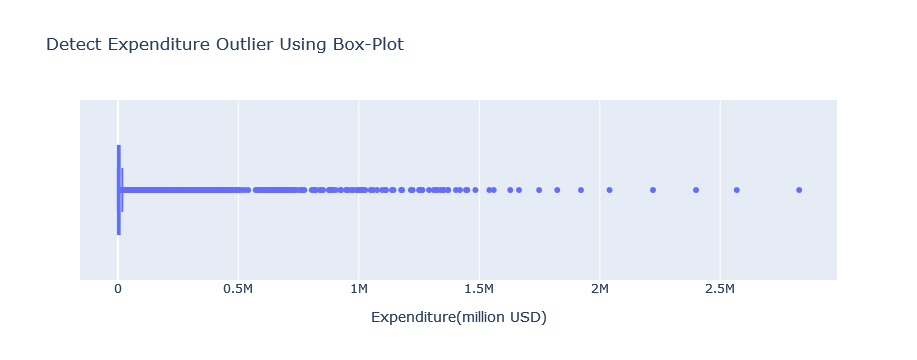

In [393]:
fig = px.box(df, x="Expenditure(million USD)", title="Detect Expenditure Outlier Using Box-Plot")
fig.show()

this is interesting, i want to see who and what kind of stuff they're doing with that much fund

In [394]:
pd.set_option('display.max_rows', None)
df[df['Expenditure(million USD)'] >= 500000].sort_values(by='Expenditure(million USD)', ascending=False).reset_index().head(10)

index  Year                   Country             Sector  \
0  15303  2021  United States of America  Social protection   
1  14600  2020  United States of America  Social protection   
2  15301  2021  United States of America             Health   
3  14598  2020  United States of America             Health   
4  13874  2019  United States of America             Health   
5  13151  2018  United States of America             Health   
6  12425  2017  United States of America             Health   
7  11705  2016  United States of America             Health   
8  10985  2015  United States of America             Health   
9  13876  2019  United States of America  Social protection   

   Expenditure(million USD)  GDP(%)  
0               2,827,585.1    12.1  
1               2,568,403.2    12.1  
2               2,399,530.2    10.2  
3               2,221,081.4    10.5  
4               2,040,519.4     9.5  
5               1,921,968.3     9.3  
6               1,823,545.6     9.3  
7               1,748,282.3     9.3  
8               1,664,821.3     9.1  
9               1,628,513.9     7.6

In [395]:
df['GDP(%)'].describe()

count   15,308.0
mean         2.4
std          3.8
min          0.0
25%          0.2
50%          0.9
75%          2.8
max         27.1
Name: GDP(%), dtype: float64

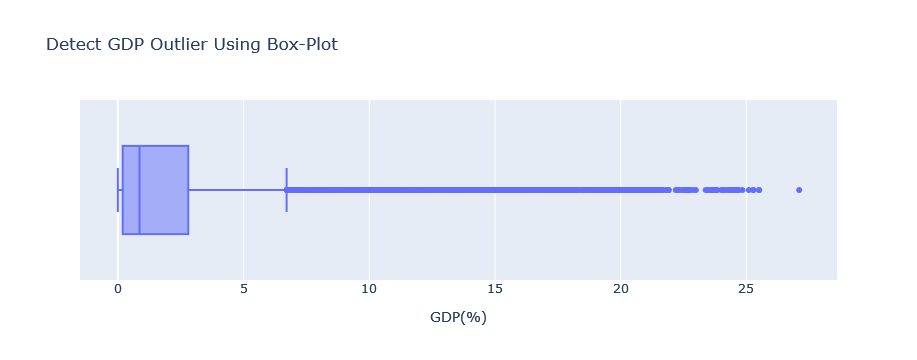

In [396]:
fig = px.box(df, x="GDP(%)", title="Detect GDP Outlier Using Box-Plot")
fig.show()

In [397]:
df[df['GDP(%)'] >= 6.7].sort_values(by='GDP(%)', ascending=False).reset_index().head(10)

index  Year  Country             Sector  Expenditure(million USD)  GDP(%)
0  14079  2020   France  Social protection                 716,872.0    27.1
1  14061  2020  Finland  Social protection                  69,343.9    25.5
2  11170  2016  Finland  Social protection                  61,351.2    25.5
3  10444  2015  Finland  Social protection                  59,262.4    25.3
4   9721  2014  Finland  Social protection                  69,326.5    25.3
5  14221  2020    Italy  Social protection                 475,917.7    25.1
6   6906  2010  Denmark  Social protection                  79,972.4    24.8
7   7596  2011  Denmark  Social protection                  84,943.7    24.7
8  14802  2021   France  Social protection                 732,100.9    24.7
9  14784  2021  Finland  Social protection                  73,300.3    24.7

In [398]:
df['Sector'].unique()

array(['Agriculture, forestry, fishing and hunting',
       'Mining, manufacturing and construction', 'Transport',
       'Fuel and energy', 'Environment protection',
       'Housing and community amenities', 'Health', 'Education',
       'Social protection', 'General public services', 'Defence',
       'Public order and safety', 'Recreation, culture and religion',
       'General economic, commercial and labour affairs',
       'Other industries', 'RandD Economic affairs',
       'Economic affairs n.e.c.', 'Communication', 'Others'], dtype=object)

In [399]:
df_groupby = df.groupby(['Year', 'Country']).agg({'Expenditure(million USD)': 'sum', 'GDP(%)': 'mean'})
df_groupby.reset_index(inplace = True)
df_groupby.head()

Year           Country  Expenditure(million USD)  GDP(%)
0  2000         Australia                 153,596.3     2.2
1  2000           Austria                 100,682.8     2.8
2  2000           Belgium                 105,549.9     5.0
3  2000          Bulgaria                   5,693.4     2.7
4  2000  China, Macao SAR                   1,019.4     1.7

<h3><b>Exploring Data to get some overview with visualization</b></h3>

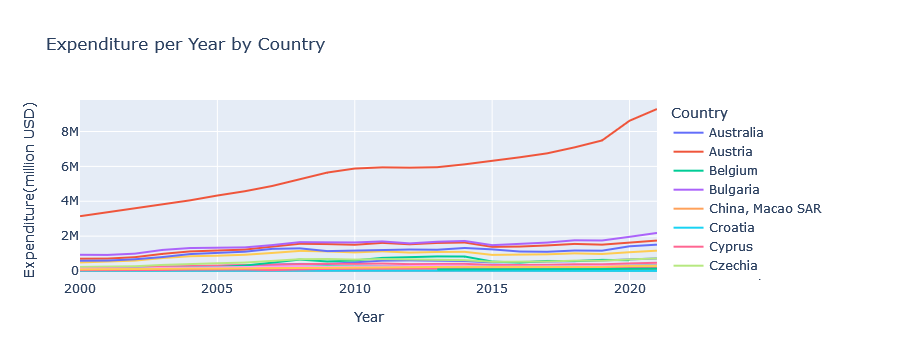

In [400]:
total_expenditure_per_year = df_groupby.groupby(['Year', 'Country'])['Expenditure(million USD)'].sum().reset_index()
fig = px.line(total_expenditure_per_year, x='Year', y='Expenditure(million USD)', color='Country', title='Expenditure per Year by Country')
fig.show()

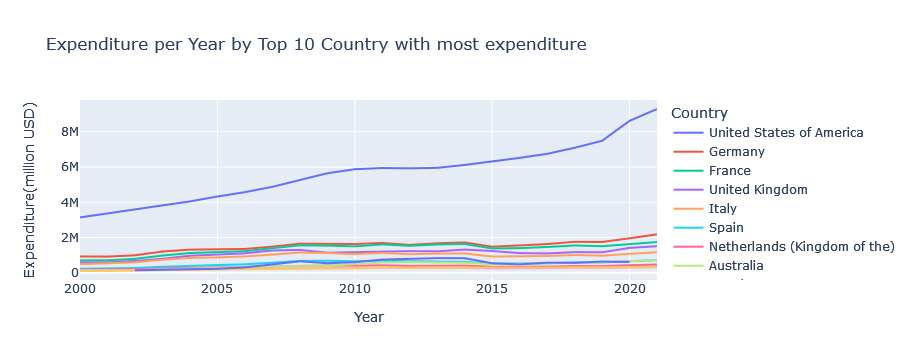

In [401]:
top_10_countries_per_year = total_expenditure_per_year.groupby('Year').apply(lambda x: x.nlargest(10, 'Expenditure(million USD)')).reset_index(drop=True)
fig = px.line(top_10_countries_per_year, x='Year', y='Expenditure(million USD)', color='Country', title='Expenditure per Year by Top 10 Country with most expenditure')
fig.show()

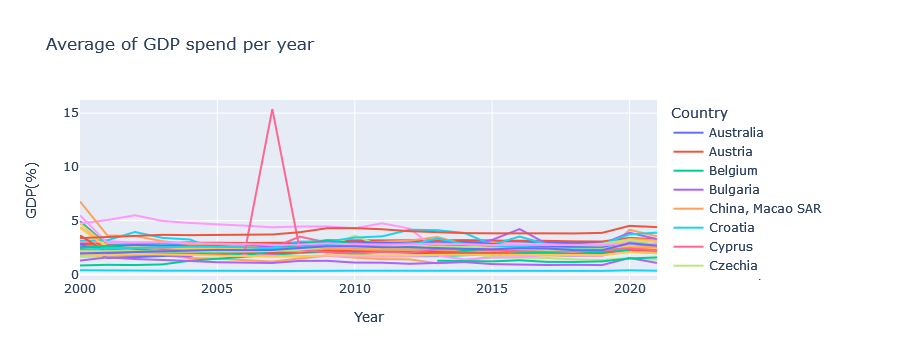

In [402]:
mean_gdp_per_year = df_groupby.groupby(['Year', 'Country'])['GDP(%)'].mean().reset_index()
fig = px.line(mean_gdp_per_year, x='Year', y='GDP(%)', color='Country', title='Average of GDP spend per year')
fig.show()

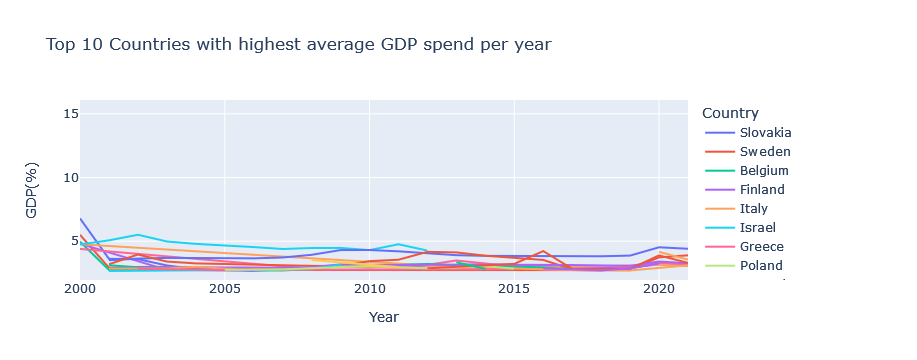

In [403]:
top_10_countries_gdp_per_year = mean_gdp_per_year.groupby('Year').apply(lambda x: x.nlargest(10, 'GDP(%)')).reset_index(drop=True)
fig = px.line(top_10_countries_gdp_per_year, x='Year', y='GDP(%)', color='Country', title='Top 10 Countries with highest average GDP spend per year')
fig.show()

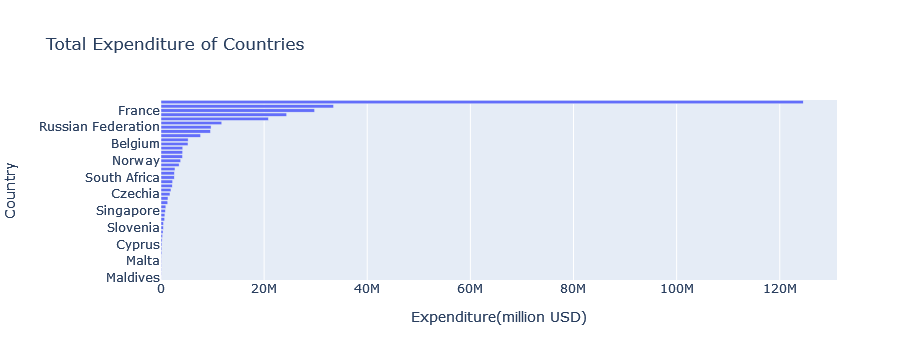

In [404]:
total_expenditure = df_groupby.groupby('Country').sum().reset_index().sort_values(by='Expenditure(million USD)', ascending=True)
fig = px.bar(total_expenditure, x='Expenditure(million USD)', y='Country', orientation='h', title='Total Expenditure of Countries')
fig.show()

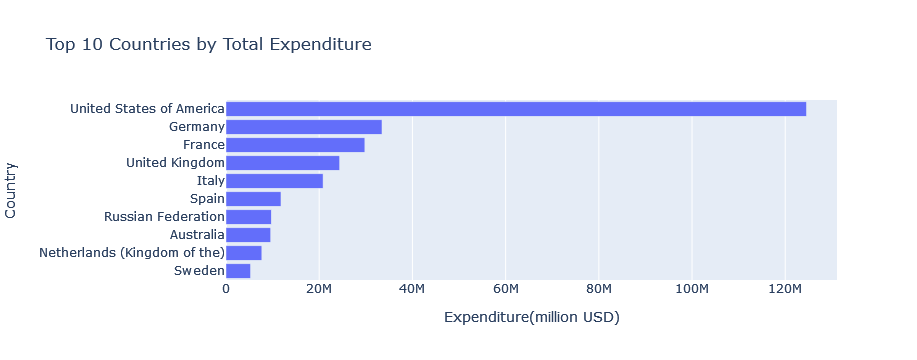

In [405]:
top_10_countries_expenditure = total_expenditure.nlargest(10, 'Expenditure(million USD)').sort_values(by='Expenditure(million USD)', ascending=True)
fig = px.bar(top_10_countries_expenditure, x='Expenditure(million USD)', y='Country', orientation='h', title='Top 10 Countries by Total Expenditure')
fig.show()

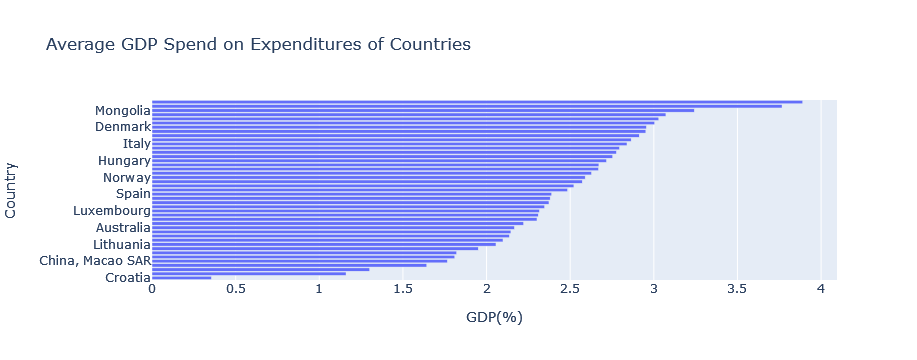

In [406]:
average_gdp = df_groupby.groupby('Country').mean().reset_index().sort_values(by='GDP(%)', ascending=True)
fig = px.bar(average_gdp, x='GDP(%)', y='Country', orientation='h', title='Average GDP Spend on Expenditures of Countries')
fig.show()

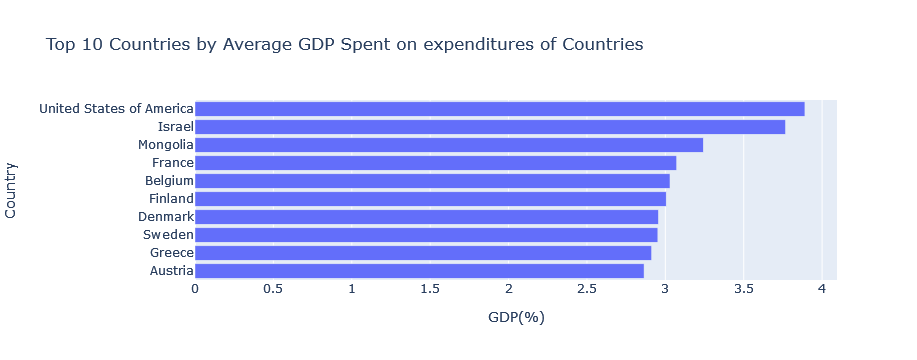

In [407]:
top_10_countries_average_gdp = average_gdp.nlargest(10, 'GDP(%)').sort_values(by='GDP(%)', ascending=True)
fig = px.bar(top_10_countries_average_gdp, x='GDP(%)', y='Country', orientation='h', title='Top 10 Countries by Average GDP Spent on expenditures of Countries')
fig.show()

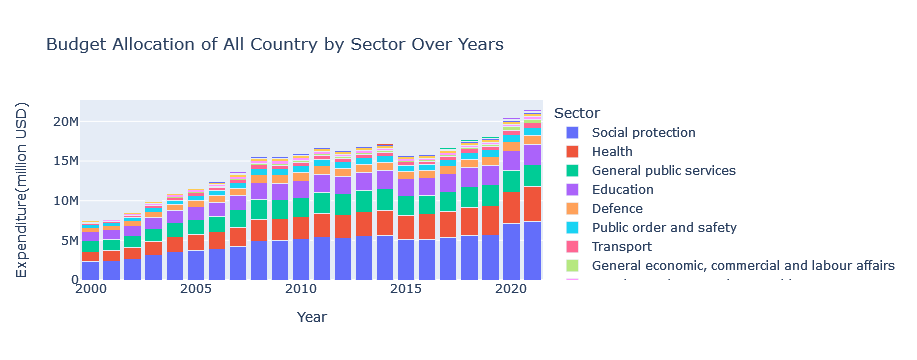

In [408]:
budget_allocation_per_year = df.groupby(['Year', 'Sector']).agg({'Expenditure(million USD)': 'sum'}).reset_index().sort_values(by='Expenditure(million USD)', ascending=False)
fig = px.bar(budget_allocation_per_year, x='Year', y='Expenditure(million USD)', color='Sector', title='Budget Allocation of All Country by Sector Over Years', barmode='stack')
fig.show()

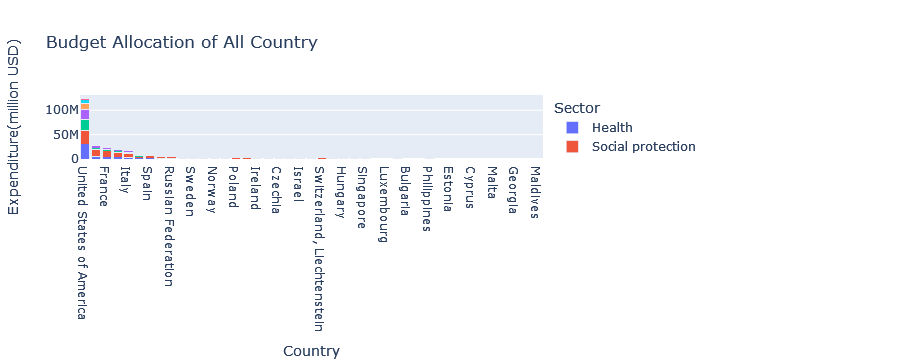

In [409]:
budget_allocation_of_countries = df.groupby(['Country','Sector']).agg({'Expenditure(million USD)': 'sum'}).reset_index().sort_values(by='Expenditure(million USD)', ascending=False)
fig = px.bar(budget_allocation_of_countries, x='Country', y='Expenditure(million USD)', color='Sector', title='Budget Allocation of All Country', barmode='stack')
fig.show()

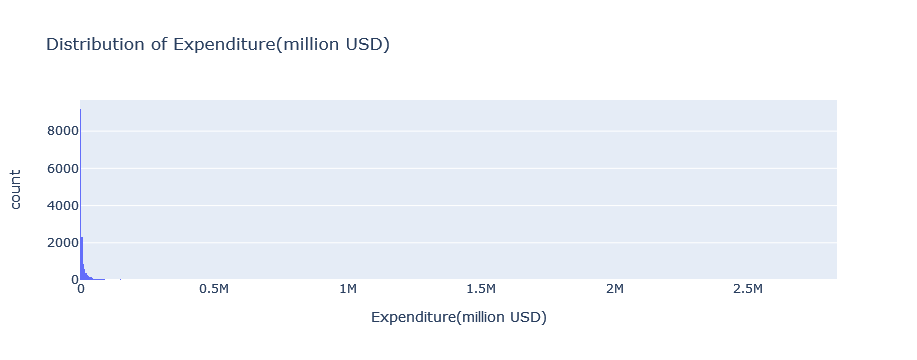

In [410]:
fig = px.histogram(df, x='Expenditure(million USD)', title='Distribution of Expenditure(million USD)')
fig.show()

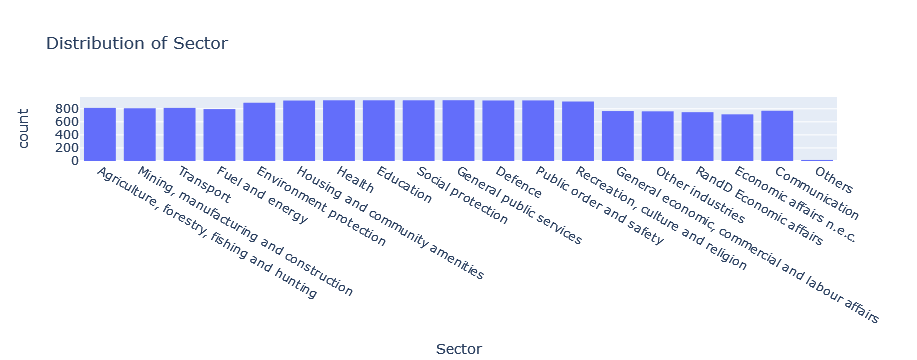

In [411]:
fig = px.histogram(df, x='Sector', title='Distribution of Sector')
fig.show()

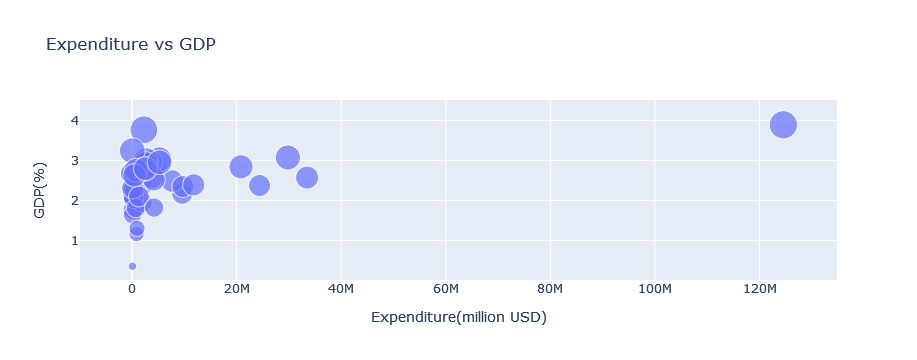

In [412]:
exp_vs_gdp = df_groupby.groupby('Country').agg({'Expenditure(million USD)': 'sum', 'GDP(%)': 'mean'}).reset_index()
fig = px.scatter(exp_vs_gdp, x='Expenditure(million USD)', y='GDP(%)', size='GDP(%)', hover_name='Country', title='Expenditure vs GDP')
fig.show()

<h3><b>Exploring Data based on sector categories and country region to create a much more viable visualization</b></h3>

<h5><b>First I want to categorize the sectors into three categories.</b></h5>
<ul>
    <li>Economic Activities</li>
    <li>Public Services</li>
    <li>Other Sectors</li>
</ul>

and then categorize the country into country region

In [413]:
# Define the sector category mapping
sector_category_mapping = {
    'Agriculture, forestry, fishing and hunting': 'Economic Activities',
    'Mining, manufacturing and construction': 'Economic Activities',
    'Transport': 'Economic Activities',
    'Fuel and energy': 'Economic Activities',
    'Environment protection': 'Economic Activities',
    'Housing and community amenities': 'Economic Activities',
    'Health': 'Public Services',
    'Education': 'Public Services',
    'Social protection': 'Public Services',
    'General public services': 'Public Services',
    'Defence': 'Public Services',
    'Public order and safety': 'Public Services',
    'Recreation, culture and religion': 'Public Services',
    'General economic, commercial and labour affairs': 'Other Sectors',
    'Other industries': 'Other Sectors',
    'RandD Economic affairs': 'Other Sectors',
    'Economic affairs n.e.c.': 'Other Sectors',
    'Communication': 'Other Sectors',
    'Others': 'Other Sectors'
}
country_region_mapping = {
    'Australia': 'Oceania',
    'Austria': 'Western Europe',
    'Belgium': 'Western Europe',
    'Bulgaria': 'Eastern Europe',
    'China, Macao SAR': 'East Asia',
    'Croatia': 'Eastern Europe',
    'Cyprus': 'Middle East',
    'Czechia': 'Eastern Europe',
    'Denmark': 'Western Europe',
    'Estonia': 'Eastern Europe',
    'Finland': 'Western Europe',
    'France': 'Western Europe',
    'Georgia': 'Eastern Europe',
    'Germany': 'Western Europe',
    'Greece': 'Eastern Europe',
    'Hungary': 'Eastern Europe',
    'Iceland': 'Western Europe',
    'Ireland': 'Western Europe',
    'Israel': 'Middle East',
    'Italy': 'Western Europe',
    'Latvia': 'Eastern Europe',
    'Lithuania': 'Eastern Europe',
    'Luxembourg': 'Western Europe',
    'Maldives': 'South Asia',
    'Malta': 'Western Europe',
    'Mongolia': 'East Asia',
    'Netherlands (Kingdom of the)': 'Western Europe',
    'Norway': 'Western Europe',
    'Philippines': 'Southeast Asia',
    'Poland': 'Eastern Europe',
    'Portugal': 'Western Europe',
    'Romania': 'Eastern Europe',
    'Russian Federation': 'Eastern Europe',
    'Singapore': 'Southeast Asia',
    'Slovakia': 'Eastern Europe',
    'Slovenia': 'Eastern Europe',
    'South Africa': 'Africa',
    'Spain': 'Western Europe',
    'Sweden': 'Western Europe',
    'Switzerland, Liechtenstein': 'Western Europe',
    'Thailand': 'Southeast Asia',
    'United Kingdom': 'Western Europe',
    'United States of America': 'North America'
}

In [414]:
df_sector_categorized = df.copy()
df_sector_categorized['Sector Category'] = df_sector_categorized['Sector'].map(sector_category_mapping)
df_sector_categorized.drop('Sector', axis=1, inplace=True)
df_sector_categorized = df_sector_categorized.groupby(['Year', 'Country', 'Sector Category']).agg({'Expenditure(million USD)': 'sum', 'GDP(%)': 'sum'}).reset_index()
df_sector_categorized.head()

Year    Country      Sector Category  Expenditure(million USD)  GDP(%)
0  2000  Australia  Economic Activities                  21,350.6     5.2
1  2000  Australia        Other Sectors                   2,422.3     0.6
2  2000  Australia      Public Services                 129,823.5    31.7
3  2000    Austria  Economic Activities                   7,833.3     4.0
4  2000    Austria        Other Sectors                   3,965.3     2.0

In [415]:
df_country_region = df.copy()
df_country_region['Country Region'] = df_country_region['Country'].map(country_region_mapping)
df_country_region.drop('Country', axis=1, inplace=True)
df_country_region = df_country_region.groupby(['Year', 'Country Region', 'Sector']).agg({'Expenditure(million USD)': 'sum', 'GDP(%)': 'mean'}).reset_index()
df_country_region.head()

Year Country Region                                      Sector  \
0  2000         Africa  Agriculture, forestry, fishing and hunting   
1  2000         Africa                                     Defence   
2  2000         Africa                                   Education   
3  2000         Africa                      Environment protection   
4  2000         Africa                             Fuel and energy   

   Expenditure(million USD)  GDP(%)  
0                     608.7     0.4  
1                   2,144.4     1.4  
2                   8,485.9     5.6  
3                     828.4     0.5  
4                      78.7     0.1

<h5><b>let's combine both function and make it into a new dataframe called df_combined</b></h5>

In [416]:
df_combined = df.copy()
df_combined['Sector Category'] = df_combined['Sector'].map(sector_category_mapping)
df_combined.drop('Sector', axis=1, inplace=True)
df_combined = df_combined.groupby(['Year', 'Country', 'Sector Category']).agg({
    'Expenditure(million USD)': 'sum', 'GDP(%)': 'sum'}).reset_index()
df_combined['Country Region'] = df_combined['Country'].map(country_region_mapping)
df_combined.drop('Country', axis=1, inplace=True)
df_combined = df_combined.groupby(['Year', 'Country Region', 'Sector Category']).agg({
    'Expenditure(million USD)': 'sum', 'GDP(%)': 'mean'}).reset_index()
df_combined.head()

Year  Country Region      Sector Category  Expenditure(million USD)  GDP(%)
0  2000          Africa  Economic Activities                   5,147.7     3.4
1  2000          Africa      Public Services                  39,901.4    26.3
2  2000       East Asia  Economic Activities                      40.1     0.5
3  2000       East Asia      Public Services                   1,227.8    16.5
4  2000  Eastern Europe  Economic Activities                  36,261.2     3.9

<h5><b>Let's visualize df_combined</b></h5>

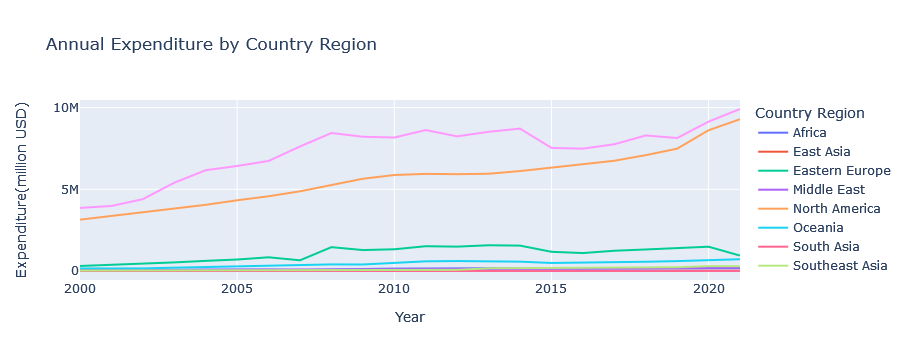

In [417]:
combined_total_exp_per_year = df_combined.groupby(['Year', 'Country Region'])['Expenditure(million USD)'].sum().reset_index()
fig = px.line(combined_total_exp_per_year, x='Year', y='Expenditure(million USD)', color='Country Region', title='Annual Expenditure by Country Region')
fig.show()

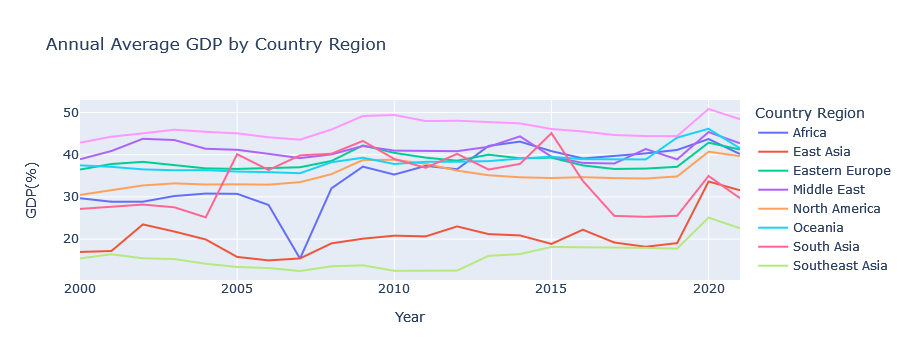

In [418]:
combined_average_gdp_per_year = df_combined.groupby(['Year', 'Country Region'])['GDP(%)'].sum().reset_index()
fig = px.line(combined_average_gdp_per_year, x='Year', y='GDP(%)', color='Country Region', title='Annual Average GDP by Country Region')
fig.show()

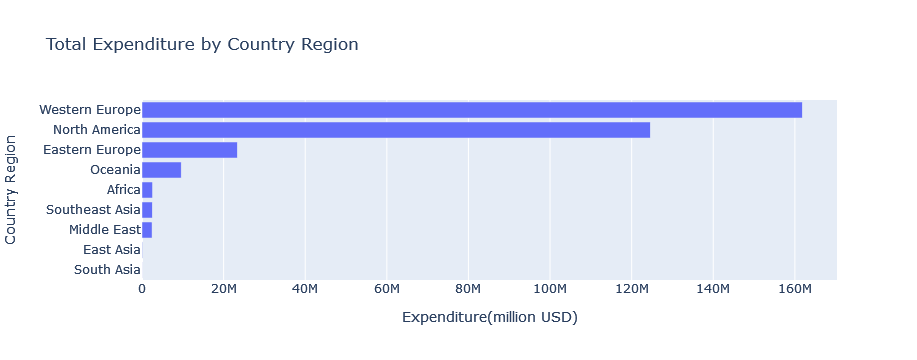

In [419]:
combined_total_expenditure = df_combined.groupby('Country Region', as_index=False)['Expenditure(million USD)'].sum(numeric_only=True).reset_index().sort_values(by='Expenditure(million USD)', ascending=True)
fig = px.bar(combined_total_expenditure, x='Expenditure(million USD)', y='Country Region', orientation='h', title='Total Expenditure by Country Region')
fig.show()

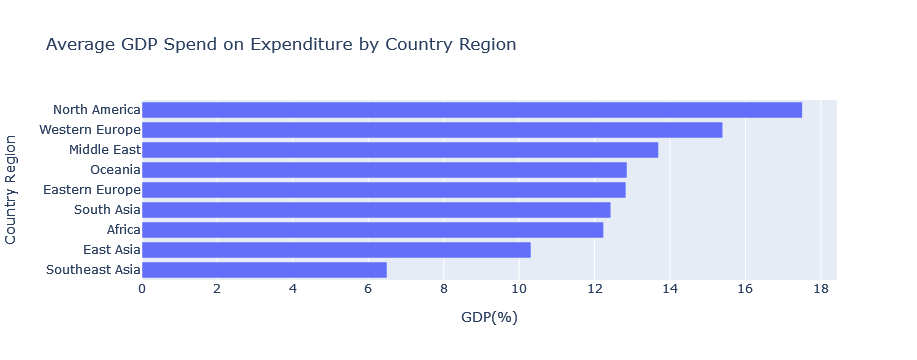

In [420]:
combined_average_gdp = df_combined.groupby('Country Region', as_index=False)['GDP(%)'].mean(numeric_only=True).reset_index().sort_values(by='GDP(%)', ascending=True)
fig = px.bar(combined_average_gdp, x='GDP(%)', y='Country Region', orientation='h', title='Average GDP Spend on Expenditure by Country Region')
fig.show()

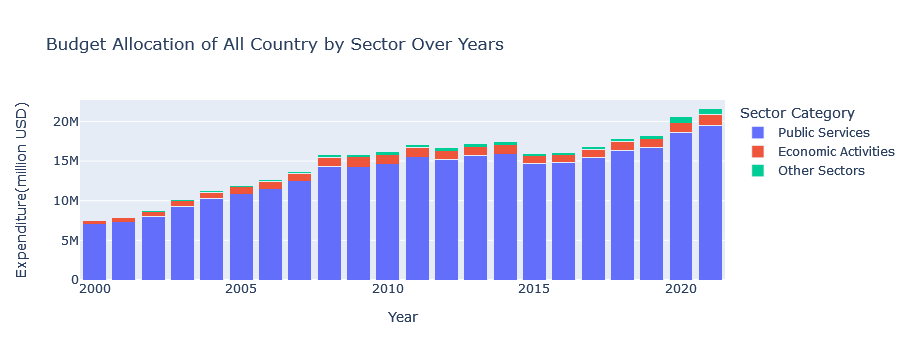

In [421]:
combined_budget_allocation_per_year = df_combined.groupby(['Year', 'Sector Category']).agg({'Expenditure(million USD)': 'sum'}).reset_index().sort_values(by='Expenditure(million USD)', ascending=False)
fig = px.bar(combined_budget_allocation_per_year, x='Year', y='Expenditure(million USD)', color='Sector Category', title='Budget Allocation of All Country by Sector Over Years', barmode='stack')
fig.show()

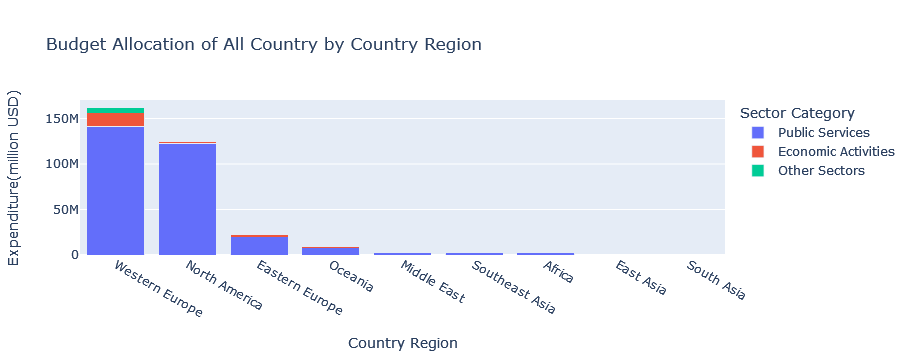

In [422]:
combined_budget_allocation_of_countries = df_combined.groupby(['Country Region','Sector Category']).agg({'Expenditure(million USD)': 'sum'}).reset_index().sort_values(by='Expenditure(million USD)', ascending=False)
fig = px.bar(combined_budget_allocation_of_countries, x='Country Region', y='Expenditure(million USD)', color='Sector Category', title='Budget Allocation of All Country by Country Region', barmode='stack')
fig.show()

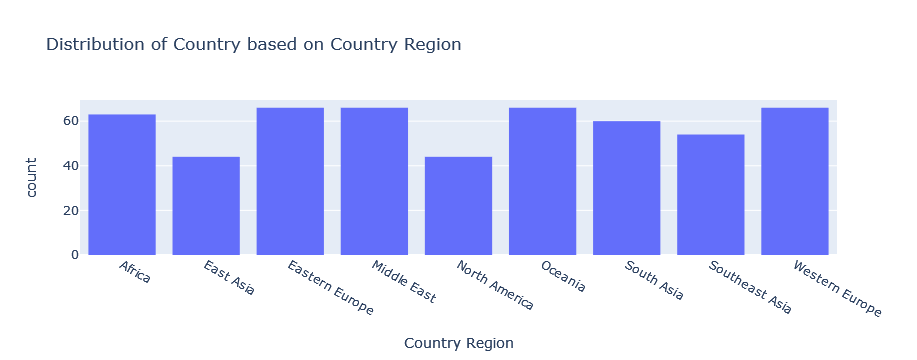

In [423]:
fig = px.histogram(df_combined, x='Country Region', title='Distribution of Country based on Country Region')
fig.show()

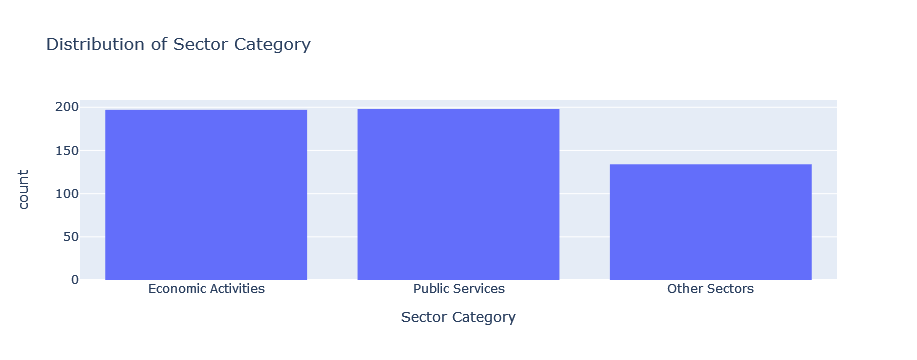

In [424]:
fig = px.histogram(df_combined, x='Sector Category', title='Distribution of Sector Category')
fig.show()

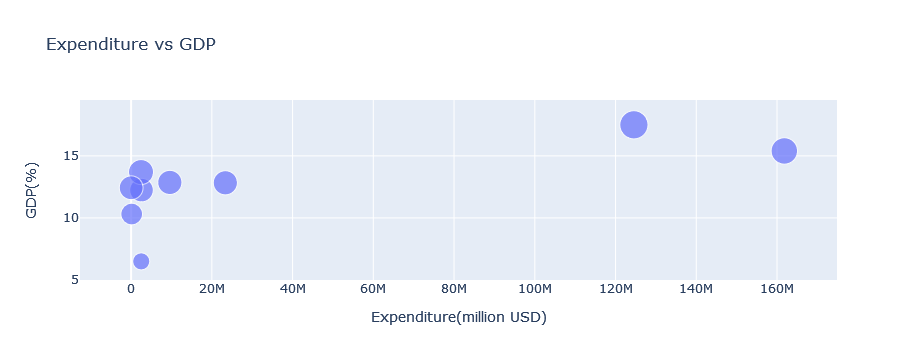

In [425]:
combined_exp_vs_gdp = df_combined.groupby('Country Region').agg({'Expenditure(million USD)': 'sum', 'GDP(%)': 'mean'}).reset_index()
fig = px.scatter(combined_exp_vs_gdp, x='Expenditure(million USD)', y='GDP(%)', size='GDP(%)', hover_name='Country Region', title='Expenditure vs GDP')
fig.show()